#                              Python Diwali Sales Analysis

In [1]:
# import python libraries

import numpy as np               # helps with working with arrays and mathematical calculations
import pandas as pd              # helps in working with dataframes (means tables or 2-D data) 
import matplotlib.pyplot as plt  # helps in visualizing data
%matplotlib inline
import seaborn as sns            # for better visualization charts

Why matplotlib inline is Used? <br>
The line magic command %matplotlib inline enables the drawing of matplotlib figures in the IPython environment. Once this command is executed in any cell, the matplotlib plots will appear directly below the cell in which the plot function was called for the rest of the session.

What is the difference between matplotlib and matplotlib inline? <br>


Matplotlib plots are displayed in a separate window or as image files by default. However, when you use the "inline" setting, the plots are embedded directly in the Jupyter Notebook or IPython shell output. This line tells Jupyter to display Matplotlib plots directly in the output of the notebook.

In [2]:
# import csv file

df = pd.read_csv(r'Diwali Sales Data.csv', encoding= 'unicode_escape') # we use 'r' to avoid or escpae special character

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop unrelated/blank columns

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values

pd.isnull(df).sum() 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values

df.dropna(inplace=True)

In [9]:
# check if null value is drop or not.

df.isnull().sum() # yes it's dropped as 'amount' is now 0, so rows with null values are dropped.

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
# another way to confirm is

df.shape  # from 11251 to 11239, Show that 12 rows have been removed.

(11239, 13)

**Note**:<br>

Significance of **inplace = True** <br>

*Below two statement does the same thing. It persists the changes made*

* df_test.dropna(inplace = True)

* df_test = df_test.dropna()

*Back to original dataset*

In [11]:
# change data type

df['Amount'] = df['Amount'].astype('int')

In [12]:
# checking if it is changed or not

df['Amount'].dtypes

dtype('int32')

In [13]:
# to get all the columns

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# rename column

df.rename(columns= {'Marital_Status':'Shaadi'}) # it won't get save as we've not use inplace = True

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc) [For numnerical columns]

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
# use describe() for specific columns

df[['Age', 'Orders', 'Amount']].describe()  # but only works for numerical columns, if a categorical column name is given, 
                                            # it won't show it's stats, for that we've to use include parameter

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

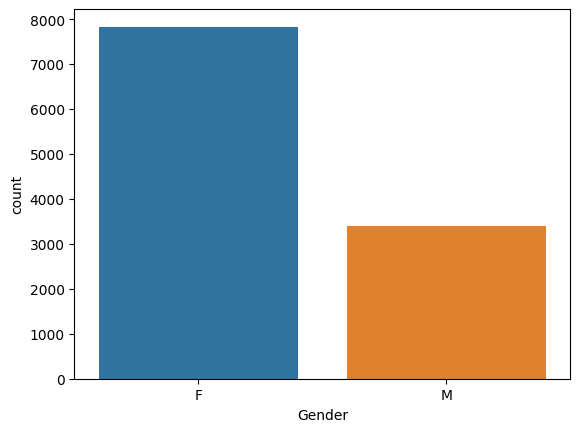

In [17]:
ax = sns.countplot(x = 'Gender', data = df)  # but values is not coming on the bars, so to get values

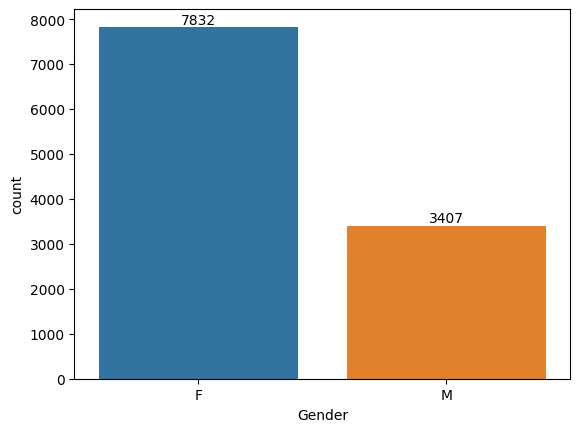

In [18]:
# plotting a bar chart for Gender with data labels

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<function matplotlib.pyplot.show(close=None, block=None)>

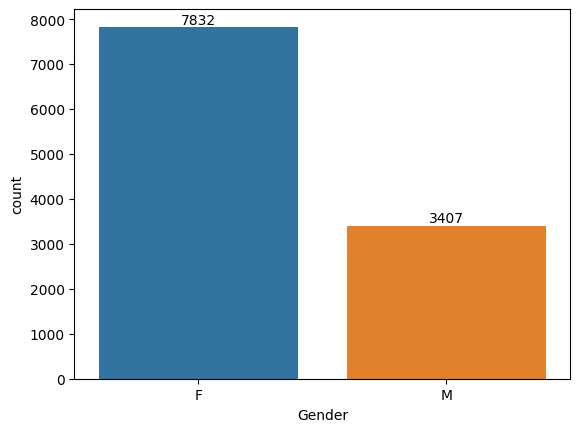

In [19]:
# another way to display labels without using for loop

ax = sns.countplot(x = 'Gender', data = df)

ax.bar_label(ax.containers[0])
plt.show

**Insight:**

* Female have purchased more than Male.

In [20]:
df.groupby(['Gender'], as_index=False)['Amount'].sum()

,Gender,Amount
0,F,74335853
1,M,31913276


In [21]:
df.groupby(['Gender'])['Amount'].sum()  # it will make or treat 'Gender' column as index, with as_index = False

Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

In [22]:
# to sort the values, based on a particular column in asc or desc order

df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

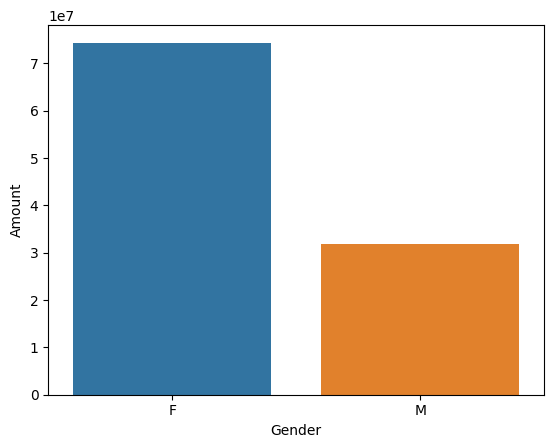

In [23]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

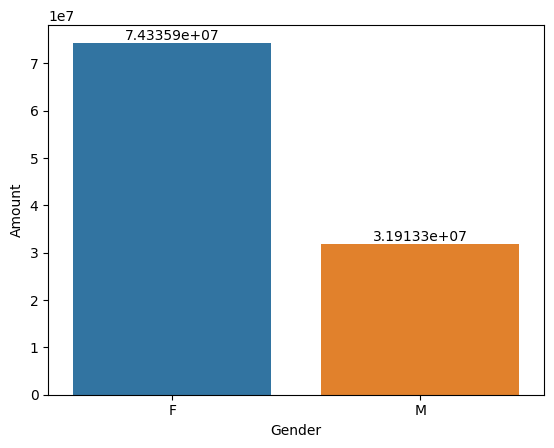

In [24]:
# Sales by Gender with data labels

ax = sns.barplot(x = 'Gender', y = 'Amount' ,data = sales_gen)

for bar in ax.containers:
    ax.bar_label(bar)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.*

### Age

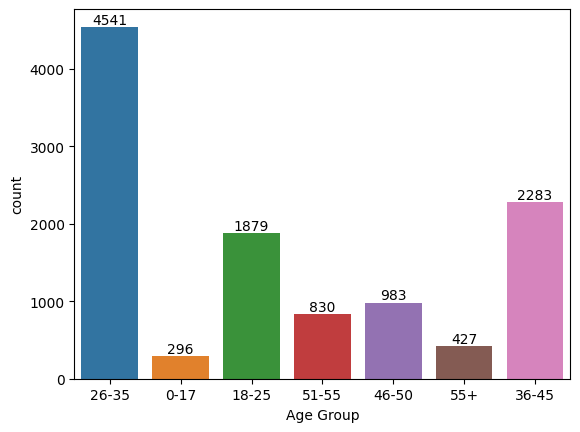

In [25]:
# countplot for Age Group with data labels

ax = sns.countplot(data = df, x = 'Age Group')

for bar in ax.containers:
    ax.bar_label(bar)

**Insigths**

* *(26-35) age group people do the max shopping. After that (36-45) age group comes next.* 

* *But we want this shopping data to be divided among gender. For this we will use 'hue' parameter.*

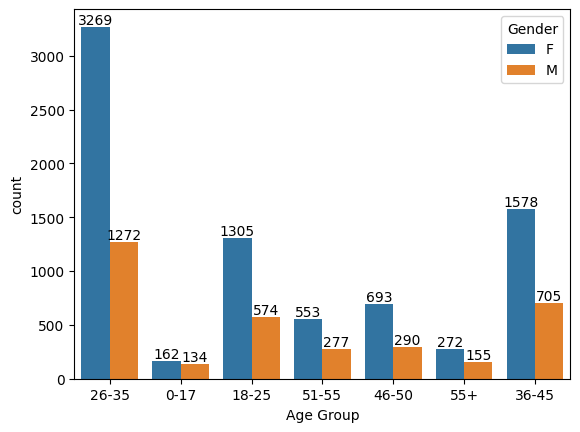

In [26]:
# countplot with 'hue' and data labels

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
# Total Amount vs Age Group

df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

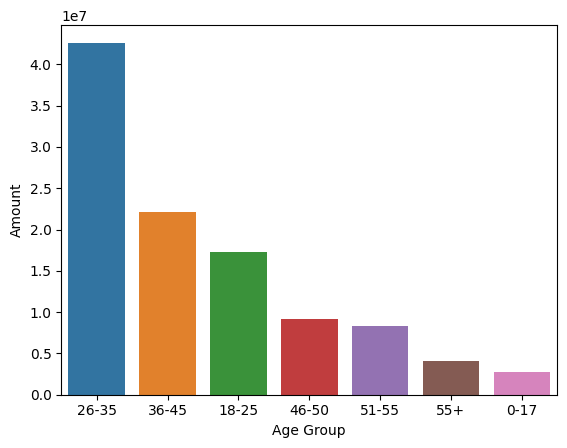

In [28]:
#plotting Age Group vs Total Amount

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group',y = 'Amount', data = sales_age)

*From above graphs we can see that most of the buyers are from age group 26-35 yrs female.*

### States

<Axes: xlabel='State', ylabel='Orders'>

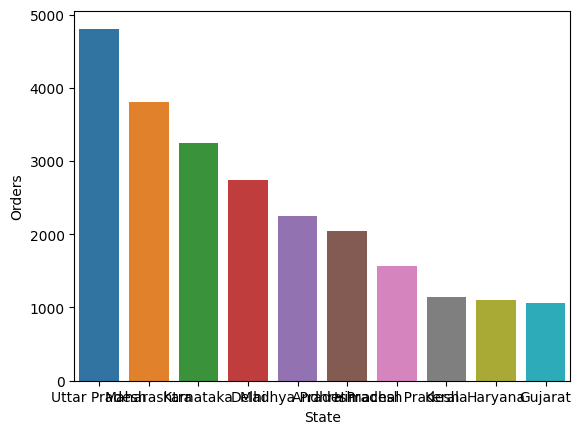

In [29]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.barplot(data = sales_state, x = 'State', y = 'Orders')

*Clearly default size is not enough to accomodate overlapping states name. So, we have to manually gives appropriate size.*

<Axes: xlabel='State', ylabel='Orders'>

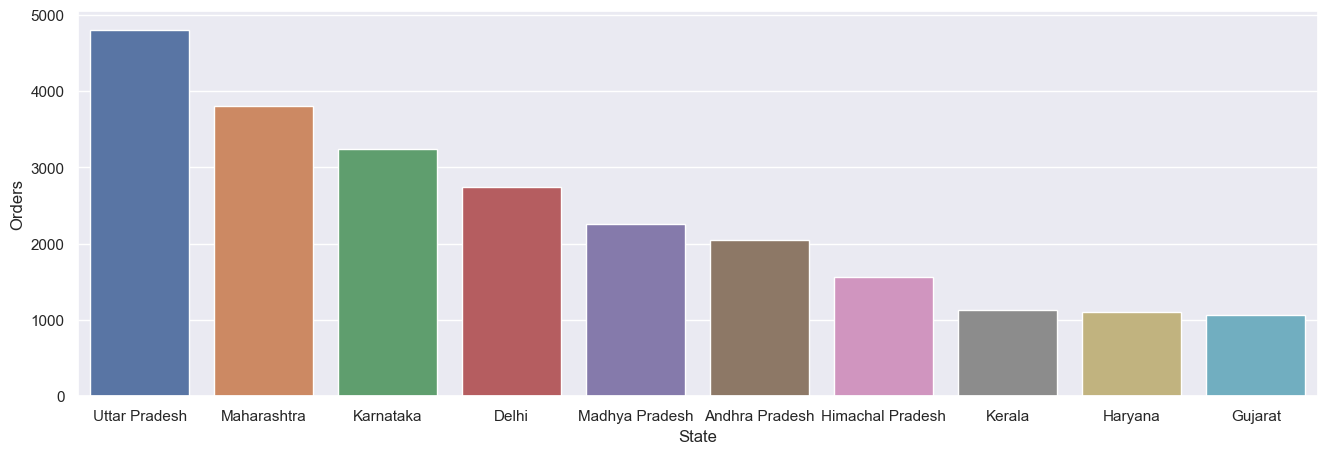

In [30]:
# Setting size for barplot in seaborn

# plt.figure(figsize = (10,5))) # this is how we set size in pyplot

sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

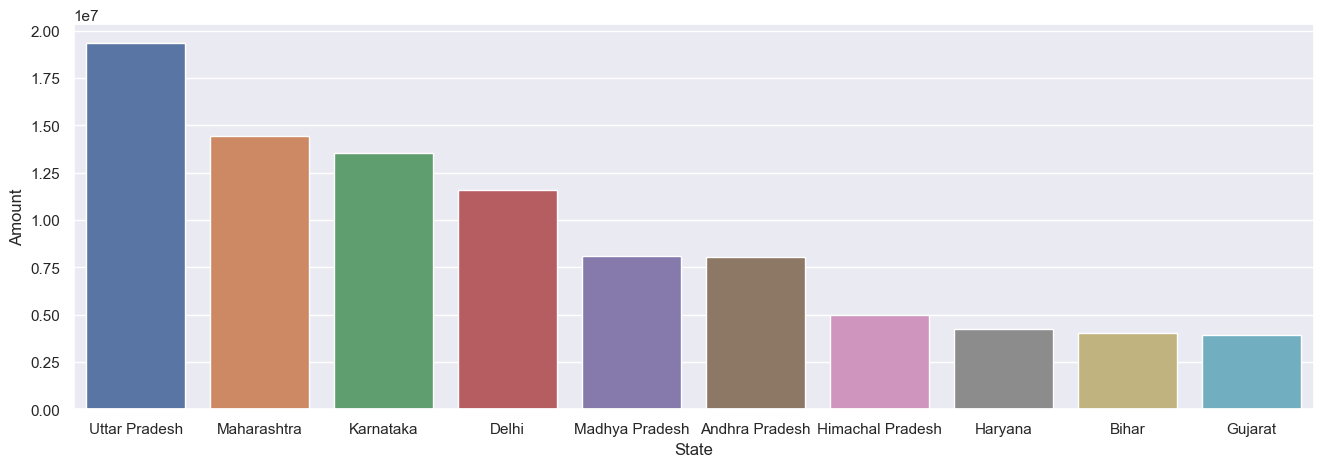

In [31]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.*


### Marital Status

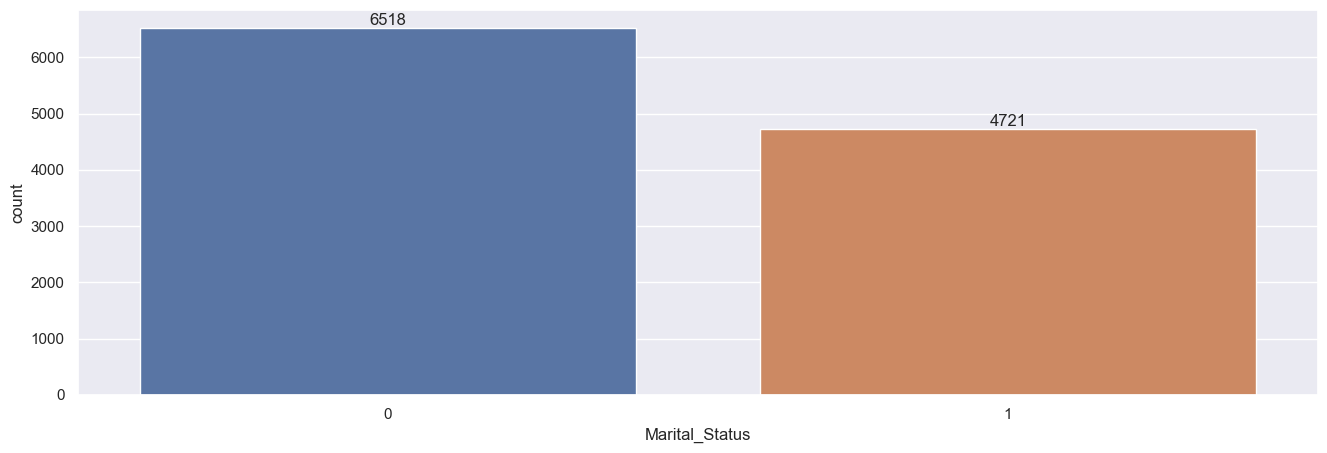

In [32]:
# total number of order vs  Marital status

ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

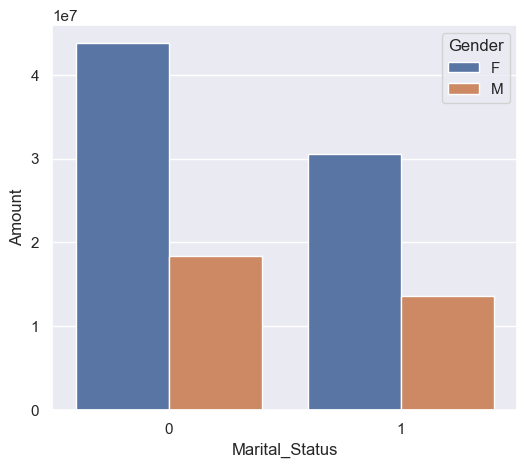

In [33]:
# total amount vs marital status by gender

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.*

### Occupation

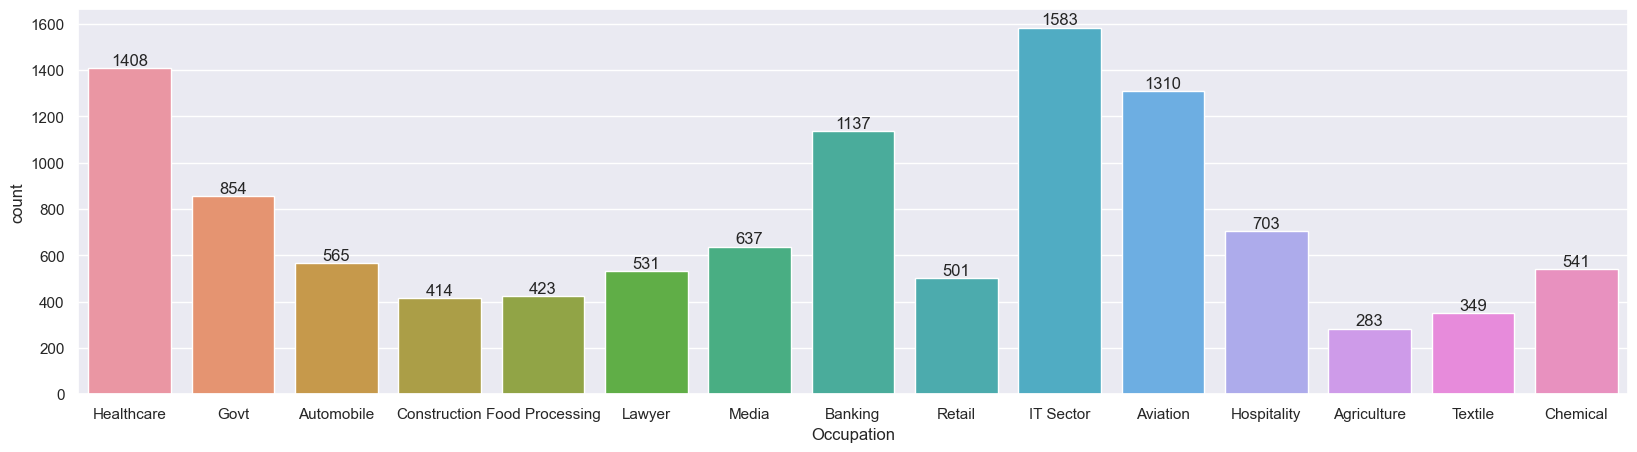

In [34]:
# Order by Occupation

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

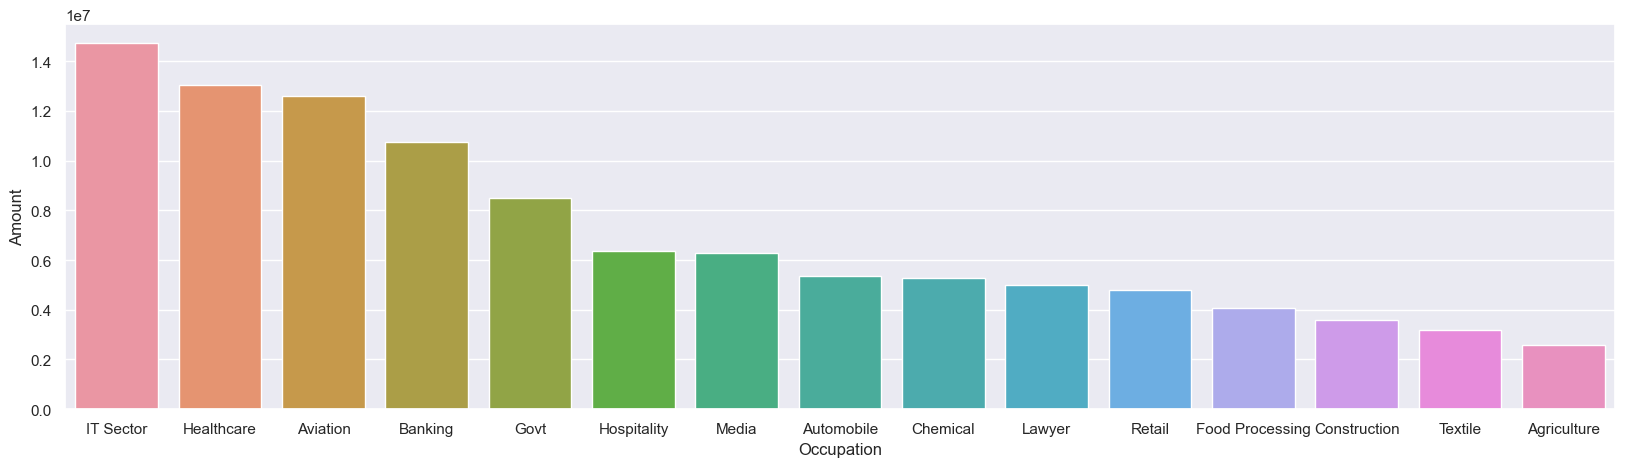

In [35]:
# total Sales by Occupation

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.*

### Product Category

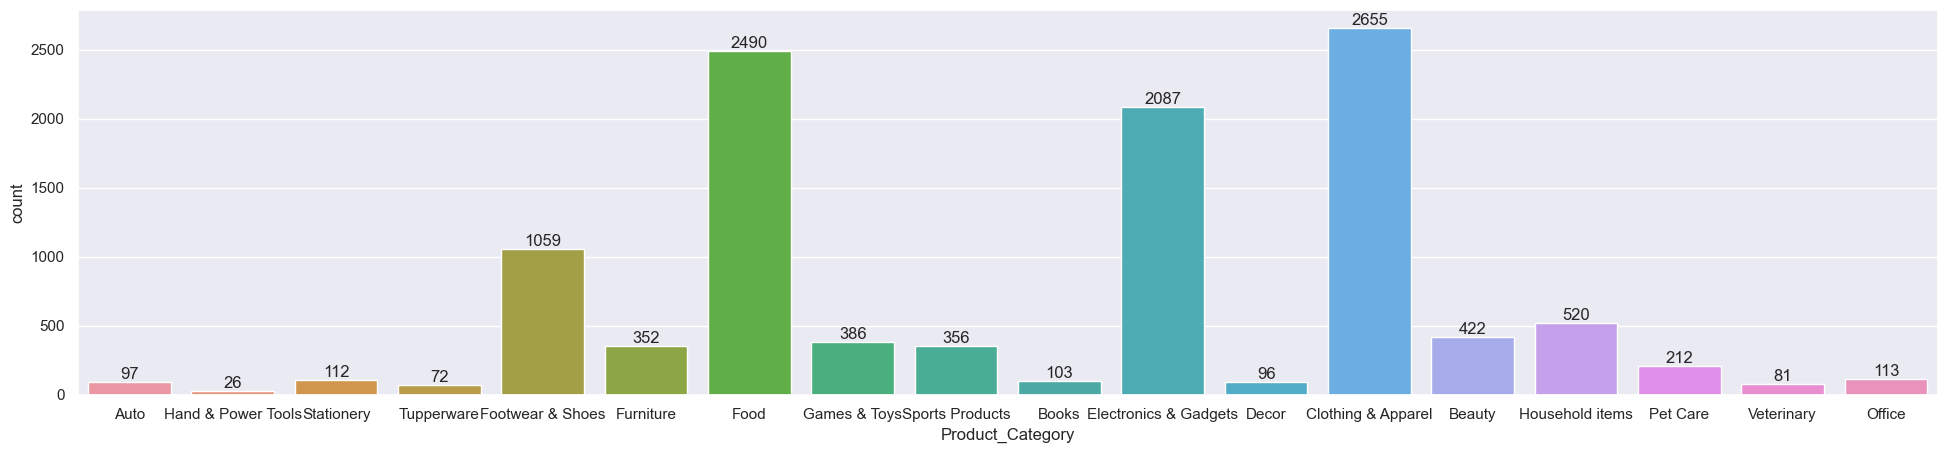

In [36]:
# Orders by Product Category

sns.set(rc={'figure.figsize':(24,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

*Order wise Clothings & Apparel is more than Food.*

<Axes: xlabel='Product_Category', ylabel='Amount'>

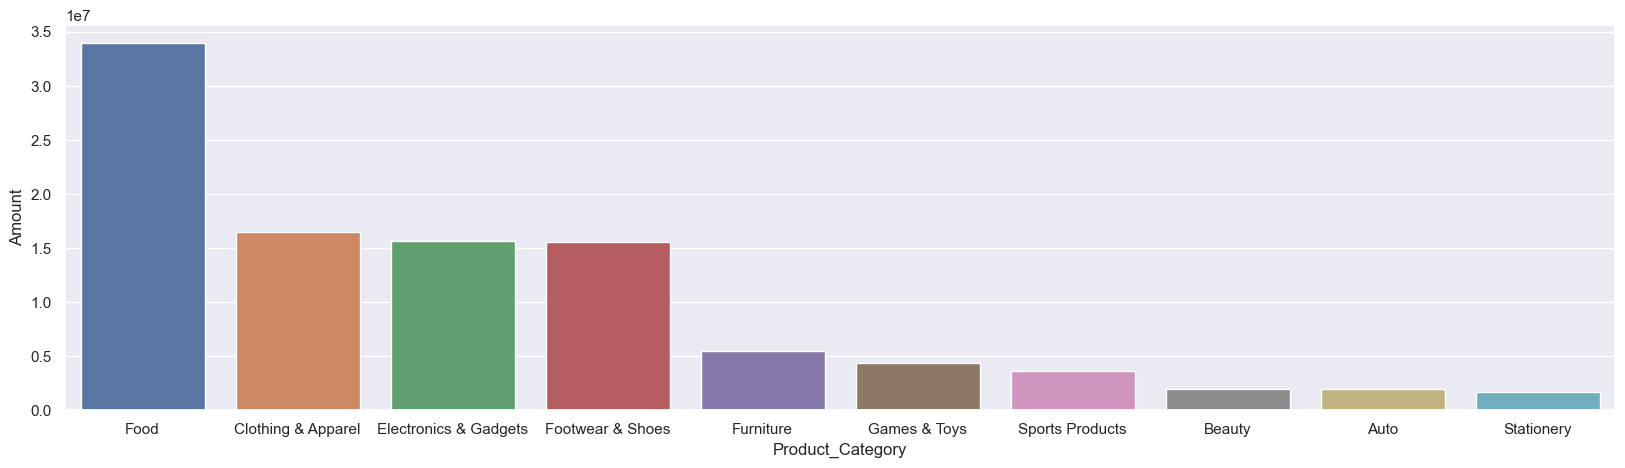

In [37]:
# Amount by Product Category

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.*

*Amount wise Food sectore defeats Clothign & Apparel.*

*That\'s why we should always check order and amount both, before giving conclusion.*

<Axes: xlabel='Product_ID', ylabel='Orders'>

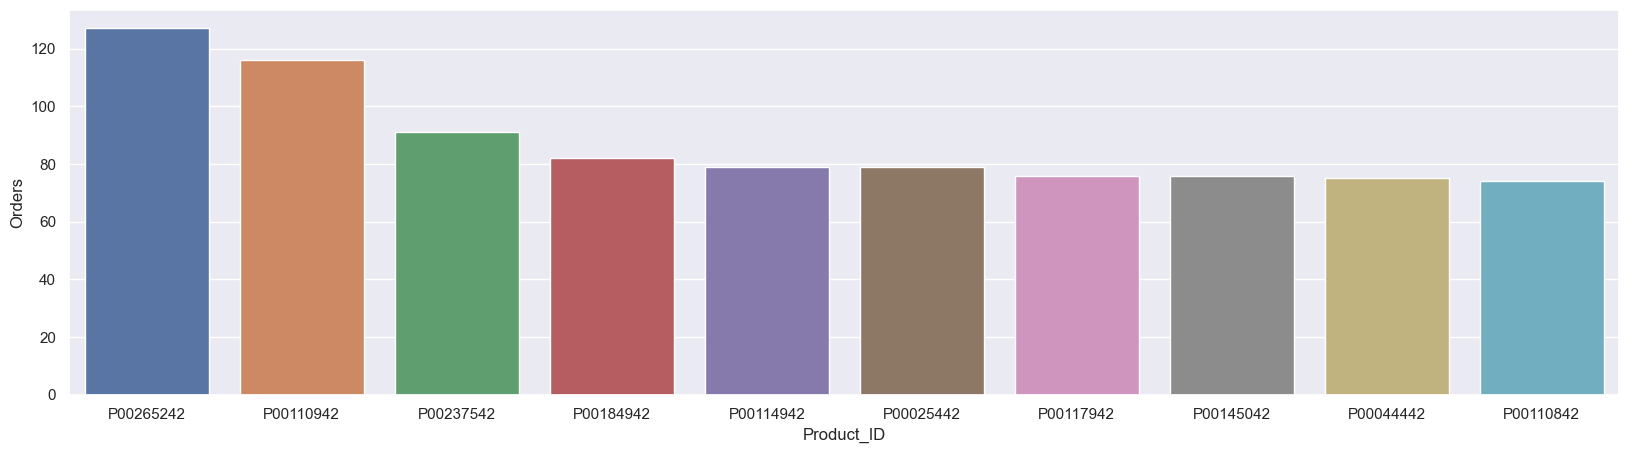

In [38]:
# top 10 selling products

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

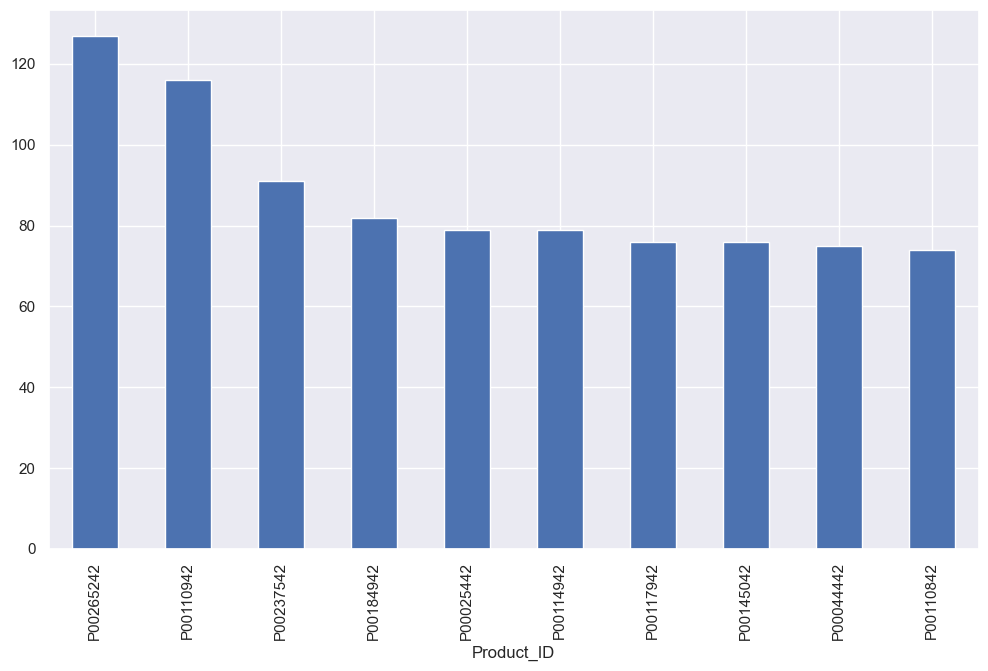

In [39]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*